In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import itertools
from sklearn.metrics import mean_squared_error
import gc
import seaborn as sns

In [2]:
#reading dataframe
df = pd.read_csv('/home/abhishek/projects/carsalesprediction/newcarsalesnorway/norway_new_car_sales_by_make.csv')

In [3]:
#assinging value to cols , which we might not need them 
cols = ['Year' ,'Month', 'Pct']

In [4]:
#merging month and year as string 
df['date'] = df.Year.astype(str).str.cat(df.Month.astype(str), sep='-')

In [5]:
#dropping the assigned columns
df = df.drop(cols, axis=1)

In [6]:
#dROPPING NULL ENTRIES 
df.dropna(inplace=True)

In [7]:
#checking data types 
df.dtypes

Make        object
Quantity     int64
date        object
dtype: object

In [8]:
#converting into date format which is important to form prediction
df['date'] = pd.to_datetime(df['date'])

In [9]:
df

,Make,Quantity,date
0,Toyota,2884,2007-01-01
1,Volkswagen,2521,2007-01-01
2,Peugeot,1029,2007-01-01
3,Ford,870,2007-01-01
4,Volvo,693,2007-01-01
5,Skoda,665,2007-01-01
6,Opel,622,2007-01-01
7,Audi,599,2007-01-01
8,Honda,423,2007-01-01
9,Mercedes-Benz,362,2007-01-01


In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Make'] = labelencoder.fit_transform(df['Make'])

In [11]:
df

,Make,Quantity,date
0,61,2884,2007-01-01
1,62,2521,2007-01-01
2,45,1029,2007-01-01
3,18,870,2007-01-01
4,63,693,2007-01-01
5,52,665,2007-01-01
6,44,622,2007-01-01
7,2,599,2007-01-01
8,19,423,2007-01-01
9,38,362,2007-01-01


In [12]:
df = df.drop('Make',axis =1)

In [13]:
df = df.groupby(['date'])['Quantity'].sum()

In [14]:
df.head(3)

date
2007-01-01    12684
2007-02-01     9793
2007-03-01    11263
Name: Quantity, dtype: int64

In [15]:
df =  pd.DataFrame([df.index, df.values])

In [16]:
df

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,2007-09-01 00:00:00,2007-10-01 00:00:00,...,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00
1,12684,9793,11263,8854,12007,11083,12061,10786,9340,11646,...,14116,12864,13681,11040,13232,13854,11932,13194,13602,13055


In [17]:
df = df.T

In [18]:
df.columns = ['date', 'Quantity']

In [19]:
df

,date,Quantity
0,2007-01-01 00:00:00,12684
1,2007-02-01 00:00:00,9793
2,2007-03-01 00:00:00,11263
3,2007-04-01 00:00:00,8854
4,2007-05-01 00:00:00,12007
5,2007-06-01 00:00:00,11083
6,2007-07-01 00:00:00,12061
7,2007-08-01 00:00:00,10786
8,2007-09-01 00:00:00,9340
9,2007-10-01 00:00:00,11646


In [20]:
df['date'] = pd.to_datetime(df['date'])

In [21]:
#assinging some training value
df_train = df.loc[df['date'] < '2016-01-01T00:00:00.000000000']

In [22]:
#assinnging test value 
df_test = df.loc[df['date'] >= '2016-01-01T00:00:00.000000000']

In [23]:
df_train_chk1 = df_train.set_index('date')

In [24]:
df_test = df_test.set_index('date')

In [25]:
df_train_chk1

,Quantity
date,
2007-01-01,12684
2007-02-01,9793
2007-03-01,11263
2007-04-01,8854
2007-05-01,12007
2007-06-01,11083
2007-07-01,12061
2007-08-01,10786
2007-09-01,9340


In [26]:
df_test

,Quantity
date,
2016-01-01,10991
2016-02-01,12222
2016-03-01,13875
2016-04-01,14116
2016-05-01,12864
2016-06-01,13681
2016-07-01,11040
2016-08-01,13232
2016-09-01,13854


In [27]:
from fbprophet import Prophet

In [28]:
m = Prophet(seasonality_mode='multiplicative',seasonality_prior_scale=0.1)

In [29]:
df_train_chk1['ds'] = df_train_chk1.index
df_train_chk1['y']  = df_train_chk1.Quantity

In [30]:
m.fit(df_train_chk1)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
future = m.make_future_dataframe(freq='M',periods = 15)

In [32]:
forecast = m.predict(future)

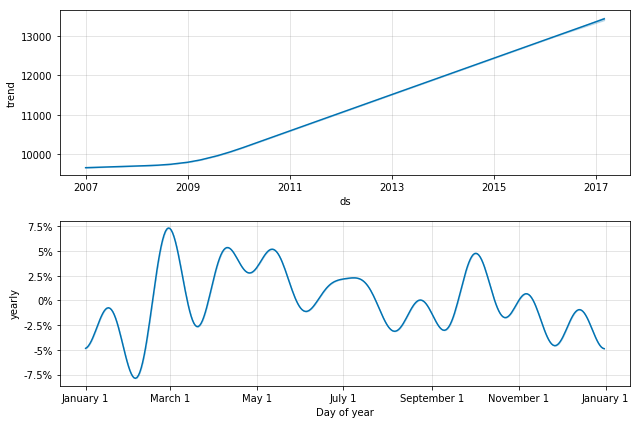

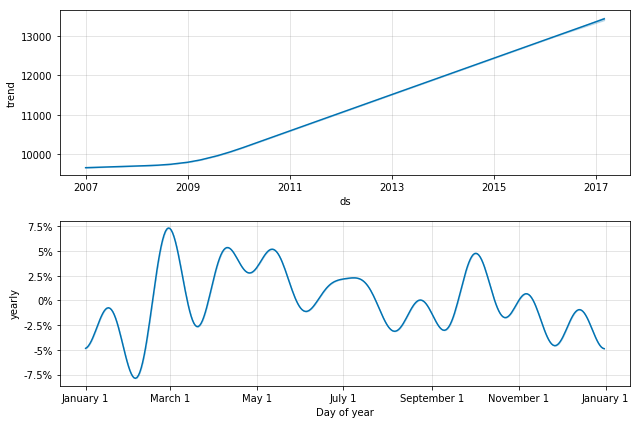

In [33]:
m.plot_components(forecast)

In [68]:
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,yhat
0,2007-01-01,9661.631367,9661.631367,9661.631367,7710.983313,10789.817115,0.0,0.0,0.0,-0.048726,-0.048726,-0.048726,-0.048726,-0.048726,-0.048726,9190.855362
1,2007-02-01,9665.265844,9665.265844,9665.265844,7427.669836,10614.431597,0.0,0.0,0.0,-0.068559,-0.068559,-0.068559,-0.068559,-0.068559,-0.068559,9002.627215
2,2007-03-01,9668.548597,9668.548597,9668.548597,8848.968011,11969.714803,0.0,0.0,0.0,0.073331,0.073331,0.073331,0.073331,0.073331,0.073331,10377.554398
3,2007-04-01,9672.183074,9672.183074,9672.183074,8295.500929,11361.947447,0.0,0.0,0.0,0.019690,0.019690,0.019690,0.019690,0.019690,0.019690,9862.632573
4,2007-05-01,9675.700310,9675.700310,9675.700310,8389.771786,11509.571894,0.0,0.0,0.0,0.032093,0.032093,0.032093,0.032093,0.032093,0.032093,9986.217971
5,2007-06-01,9679.334786,9679.334786,9679.334786,8092.600645,11121.424757,0.0,0.0,0.0,-0.006992,-0.006992,-0.006992,-0.006992,-0.006992,-0.006992,9611.657552
6,2007-07-01,9682.852022,9682.852022,9682.852022,8401.035977,11444.619095,0.0,0.0,0.0,0.021622,0.021622,0.021622,0.021622,0.021622,0.021622,9892.210828
7,2007-08-01,9686.486499,9686.486499,9686.486499,7842.089535,10991.530699,0.0,0.0,0.0,-0.024489,-0.024489,-0.024489,-0.024489,-0.024489,-0.024489,9449.272242
8,2007-09-01,9690.120975,9690.120975,9690.120975,7929.569280,11042.006780,0.0,0.0,0.0,-0.011800,-0.011800,-0.011800,-0.011800,-0.011800,-0.011800,9575.778544
9,2007-10-01,9693.638211,9693.638211,9693.638211,8537.867910,11730.565929,0.0,0.0,0.0,0.046949,0.046949,0.046949,0.046949,0.046949,0.046949,10148.747866


In [69]:
y_pred = forecast

In [70]:
cols222 = ['trend_lower' ,'trend_upper' ,'yhat_lower','yhat_upper', 'additive_terms' ,'additive_terms','additive_terms_upper','additive_terms_lower' ,'multiplicative_terms' ,'multiplicative_terms_lower' ,'multiplicative_terms_upper','yearly','yearly_lower' ,'yearly_upper','yhat']

In [71]:
y_pred = y_pred.drop(cols222,axis=1)

In [72]:
y_pred

,ds,trend
0,2007-01-01,9661.631367
1,2007-02-01,9665.265844
2,2007-03-01,9668.548597
3,2007-04-01,9672.183074
4,2007-05-01,9675.700310
5,2007-06-01,9679.334786
6,2007-07-01,9682.852022
7,2007-08-01,9686.486499
8,2007-09-01,9690.120975
9,2007-10-01,9693.638211


In [73]:
df_test

,Quantity
date,
2016-01-01,10991
2016-02-01,12222
2016-03-01,13875
2016-04-01,14116
2016-05-01,12864
2016-06-01,13681
2016-07-01,11040
2016-08-01,13232
2016-09-01,13854


In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [75]:
y_pred = y_pred.loc[y_pred['ds'] <= '2017-02-01T00:00:00.000000000']

In [76]:
y_pred

,ds,trend
0,2007-01-01,9661.631367
1,2007-02-01,9665.265844
2,2007-03-01,9668.548597
3,2007-04-01,9672.183074
4,2007-05-01,9675.700310
5,2007-06-01,9679.334786
6,2007-07-01,9682.852022
7,2007-08-01,9686.486499
8,2007-09-01,9690.120975
9,2007-10-01,9693.638211


In [77]:
y_pred = y_pred.loc[y_pred['ds'] >= '2016-01-31T00:00:00.000000000']

In [78]:
y_pred1 = y_pred

In [79]:
df_test

,Quantity
date,
2016-01-01,10991
2016-02-01,12222
2016-03-01,13875
2016-04-01,14116
2016-05-01,12864
2016-06-01,13681
2016-07-01,11040
2016-08-01,13232
2016-09-01,13854


In [80]:
y_pred1 

,ds,trend
109,2016-01-31,12937.772993
110,2016-02-29,12974.399059
111,2016-03-31,13013.551061
112,2016-04-30,13051.440095
113,2016-05-31,13090.592097
114,2016-06-30,13128.481131
115,2016-07-31,13167.633133
116,2016-08-31,13206.785134
117,2016-09-30,13244.674168
118,2016-10-31,13283.826170


In [81]:
y_pred

,ds,trend
109,2016-01-31,12937.772993
110,2016-02-29,12974.399059
111,2016-03-31,13013.551061
112,2016-04-30,13051.440095
113,2016-05-31,13090.592097
114,2016-06-30,13128.481131
115,2016-07-31,13167.633133
116,2016-08-31,13206.785134
117,2016-09-30,13244.674168
118,2016-10-31,13283.826170


In [83]:
y_pred22 = y_pred

In [84]:
y_pred22['ds'] = pd.to_datetime(y_pred22.ds) + pd.to_timedelta(pd.np.ceil(1), unit="D")
y_pred22

/home/abhishek/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ds,trend
109,2016-02-01,12937.772993
110,2016-03-01,12974.399059
111,2016-04-01,13013.551061
112,2016-05-01,13051.440095
113,2016-06-01,13090.592097
114,2016-07-01,13128.481131
115,2016-08-01,13167.633133
116,2016-09-01,13206.785134
117,2016-10-01,13244.674168
118,2016-11-01,13283.826170


In [85]:
from math import sqrt
from sklearn.metrics import mean_squared_error


In [86]:
y_pred22 = y_pred22.set_index('ds')

In [87]:
y_pred22

,trend
ds,
2016-02-01,12937.772993
2016-03-01,12974.399059
2016-04-01,13013.551061
2016-05-01,13051.440095
2016-06-01,13090.592097
2016-07-01,13128.481131
2016-08-01,13167.633133
2016-09-01,13206.785134
2016-10-01,13244.674168


In [88]:
rms = sqrt(mean_squared_error(df_test,y_pred22))

In [89]:
print(rms)

1019.33981378


In [90]:
from pandas import Series
from matplotlib import pyplot


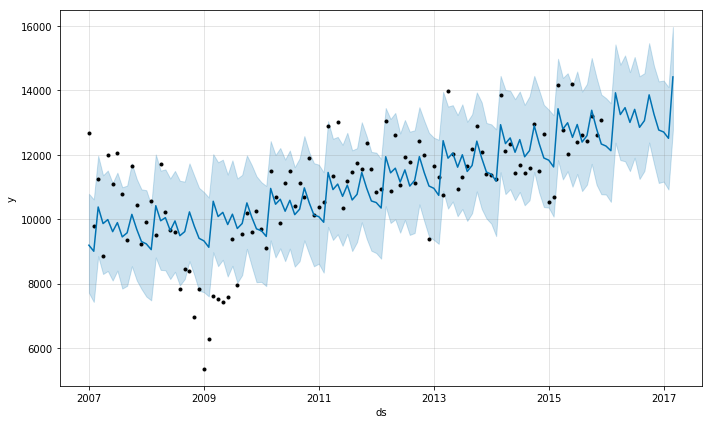

In [91]:
fig = m.plot(forecast)